In [1]:
dict1={'X':[2000,4800,3100,2821,1828,700], 'Y':[25000,42000,30000,20000,18000,15000]}

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
data=pd.DataFrame(dict1)

In [5]:
data

,X,Y
0,2000,25000
1,4800,42000
2,3100,30000
3,2821,20000
4,1828,18000
5,700,15000


In [7]:
mean_X=np.mean(pd.Series(data['X']))
mean_X

2541.5

In [9]:
mean_Y=np.mean(pd.Series(data['Y']))
mean_Y

25000.0

In [10]:
def diffx(data):
    return data-mean_X
def diffy(data):
    return data-mean_Y

In [11]:
data['xi-x']=data['X'].apply(diffx)

In [12]:
data

,X,Y,xi-x
0,2000,25000,-541.5
1,4800,42000,2258.5
2,3100,30000,558.5
3,2821,20000,279.5
4,1828,18000,-713.5
5,700,15000,-1841.5


In [13]:
data['yi-y']=data['Y'].apply(diffy)

In [14]:
data

,X,Y,xi-x,yi-y
0,2000,25000,-541.5,0.0
1,4800,42000,2258.5,17000.0
2,3100,30000,558.5,5000.0
3,2821,20000,279.5,-5000.0
4,1828,18000,-713.5,-7000.0
5,700,15000,-1841.5,-10000.0


In [15]:
data.X.mean()

2541.5

In [17]:
def mul(data1,data2):
    return data1*data2
data['(xi-x)(yi-y)']=data['xi-x']*data['yi-y']

In [18]:
data

,X,Y,xi-x,yi-y,(xi-x)(yi-y)
0,2000,25000,-541.5,0.0,-0.0
1,4800,42000,2258.5,17000.0,38394500.0
2,3100,30000,558.5,5000.0,2792500.0
3,2821,20000,279.5,-5000.0,-1397500.0
4,1828,18000,-713.5,-7000.0,4994500.0
5,700,15000,-1841.5,-10000.0,18415000.0


In [19]:
data['(xi-x)**2)']=data['xi-x']**2

In [20]:
data

,X,Y,xi-x,yi-y,(xi-x)(yi-y),(xi-x)**2)
0,2000,25000,-541.5,0.0,-0.0,293222.25
1,4800,42000,2258.5,17000.0,38394500.0,5100822.25
2,3100,30000,558.5,5000.0,2792500.0,311922.25
3,2821,20000,279.5,-5000.0,-1397500.0,78120.25
4,1828,18000,-713.5,-7000.0,4994500.0,509082.25
5,700,15000,-1841.5,-10000.0,18415000.0,3391122.25


In [21]:
b1=sum(data['(xi-x)(yi-y)'])/sum(data['(xi-x)**2)'])
b1

6.525929129663228

In [22]:
b0=mean_Y-b1*mean_X
b0

8414.351116960905

In [23]:
def regression(x):
    return b1*x+b0

In [24]:
regression(2000)

21466.209376287363

In [25]:
data[['X','Y']].plot

In [30]:
data['yhat']=data['X'].apply(regression)
data

,X,Y,xi-x,yi-y,(xi-x)(yi-y),(xi-x)**2),yhat
0,2000,25000,-541.5,0.0,-0.0,293222.25,21466.209376
1,4800,42000,2258.5,17000.0,38394500.0,5100822.25,39738.810939
2,3100,30000,558.5,5000.0,2792500.0,311922.25,28644.731419
3,2821,20000,279.5,-5000.0,-1397500.0,78120.25,26823.997192
4,1828,18000,-713.5,-7000.0,4994500.0,509082.25,20343.749566
5,700,15000,-1841.5,-10000.0,18415000.0,3391122.25,12982.501508


In [32]:
data['(yhat-y)']=data['yhat']-data['Y']
data

,X,Y,xi-x,yi-y,(xi-x)(yi-y),(xi-x)**2),yhat,(yhat-y)
0,2000,25000,-541.5,0.0,-0.0,293222.25,21466.209376,-3533.790624
1,4800,42000,2258.5,17000.0,38394500.0,5100822.25,39738.810939,-2261.189061
2,3100,30000,558.5,5000.0,2792500.0,311922.25,28644.731419,-1355.268581
3,2821,20000,279.5,-5000.0,-1397500.0,78120.25,26823.997192,6823.997192
4,1828,18000,-713.5,-7000.0,4994500.0,509082.25,20343.749566,2343.749566
5,700,15000,-1841.5,-10000.0,18415000.0,3391122.25,12982.501508,-2017.498492


In [33]:
SDE=np.sqrt(sum(data['(yhat-y)']**2)/(len(data)-2))

In [34]:
SDE

4346.487229200542

<Axes: >

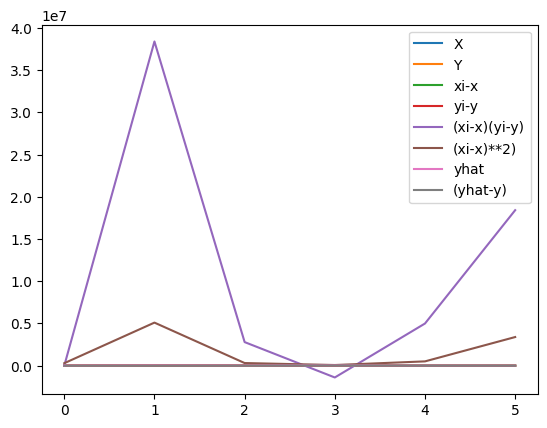

In [35]:
data.plot()